## Mahyar Mohammadi - 610398116 - MiniProject2

### import libraries and get data

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

In [147]:
train = pd.read_csv("train_set.csv")
test = pd.read_csv("test_set.csv")

In [148]:
display(train.head())
display(test.head())

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,target
0,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,24.4
1,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
2,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34,20.6
3,0.05302,0.0,3.41,0.0,0.489,7.079,63.1,3.4145,2.0,270.0,17.8,396.06,5.70,28.7
4,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81,25.3


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
1,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
2,0.09103,0.0,2.46,0.0,0.488,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82
3,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79
4,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79


### Make standard data

In [149]:
target = train['target'].copy()
train_std = train.drop('target',axis=1).copy()
train_std = train_std.apply(lambda x:(x-np.mean(x))/(x.var()**(0.5)),axis=0)
train_std['f0'] = 1
train_std['target'] = target
train_std

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f0,target
0,-0.399058,0.394667,-0.617056,-0.282118,-0.789287,0.357043,-0.378518,0.063337,-0.748459,-1.084166,0.029340,0.406818,-0.705070,1,24.4
1,0.613974,-0.472874,1.012950,-0.282118,1.596078,-0.917268,0.887923,-0.924376,1.657786,1.539851,0.788684,0.428759,1.426199,1,12.8
2,-0.151811,-0.472874,1.012950,-0.282118,0.239186,-0.575960,-0.982956,-0.027661,1.657786,1.539851,0.788684,0.132779,0.084133,1,20.6
3,-0.405783,-0.472874,-1.136493,-0.282118,-0.573221,1.113797,-0.220213,-0.173210,-0.863042,-0.805772,-0.350331,0.419259,-0.990645,1,28.7
4,-0.396120,-0.472874,-0.624372,-0.282118,-0.927569,-0.159116,-2.252995,0.911426,-0.748459,-1.024933,-0.302872,0.275736,-0.975171,1,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,-0.404970,-0.472874,-1.275497,-0.282118,-0.581864,-0.181497,-0.015136,-0.236603,-0.748459,-1.261865,-0.350331,0.318035,0.057404,1,29.6
402,-0.272499,-0.472874,1.229503,3.535882,0.429323,-0.045813,0.841151,-0.933217,-0.519293,-0.017974,-1.821560,-0.226989,-1.018781,1,27.0
403,1.424437,-0.472874,1.012950,-0.282118,1.250373,-1.406850,1.039032,-1.108300,1.657786,1.539851,0.788684,0.428759,2.541774,1,7.2
404,-0.251760,-0.472874,1.229503,-0.282118,0.429323,1.687306,0.776390,-0.852095,-0.519293,-0.017974,-1.821560,0.174626,-1.549136,1,50.0


### some useful functions

In [ ]:
weight_calc = lambda X,y,L:np.linalg.inv((X.T@X)+ (L*np.identity(len(X.T))))@X.T@y
MSE = lambda w,X,y: np.mean((X.to_numpy()@w-y)**2)

In [150]:
def make_future(train,degree):
    target = train['target'].copy() if 'target' in train.columns else None
    train_std = train.drop('target',axis=1).copy() if 'target' in train.columns else train.copy()
    train_std = train_std.apply(lambda x:(x-np.mean(x))/(x.var()**(0.5)),axis=0)
    train_std['f0'] = 1
    
    df = train_std.copy()
    columns = [column for column in df.columns if column!='target' and not (df[column]==1).all()]
    bias = df['f0'].copy()
    df = df[columns].copy()
    new_power = [(df**i).set_axis([f'{e}^{i}' for e in columns],axis=1) for i in range(1,degree+1)]
    return pd.concat([bias]+new_power,axis=1),target
X,y = make_future(train,5)
X

,f0,f1^1,f2^1,f3^1,f4^1,f5^1,f6^1,f7^1,f8^1,f9^1,...,f4^5,f5^5,f6^5,f7^5,f8^5,f9^5,f10^5,f11^5,f12^5,f13^5
0,1,-0.399058,0.394667,-0.617056,-0.282118,-0.789287,0.357043,-0.378518,0.063337,-0.748459,...,-0.001787,-0.306319,5.802347e-03,-7.770207e-03,1.019247e-06,-0.234877,-1.497888e+00,2.174355e-08,0.011143,-1.742447e-01
1,1,0.613974,-0.472874,1.012950,-0.282118,1.596078,-0.917268,0.887923,-0.924376,1.657786,...,-0.001787,10.357868,-6.493532e-01,5.519207e-01,-6.749071e-01,12.521081,8.657519e+00,3.051514e-01,0.014490,5.900664e+00
2,1,-0.151811,-0.472874,1.012950,-0.282118,0.239186,-0.575960,-0.982956,-0.027661,1.657786,...,-0.001787,0.000783,-6.338112e-02,-9.176347e-01,-1.619326e-08,12.521081,8.657519e+00,3.051514e-01,0.000041,4.215320e-06
3,1,-0.405783,-0.472874,-1.136493,-0.282118,-0.573221,1.113797,-0.220213,-0.173210,-0.863042,...,-0.001787,-0.061889,1.714073e+00,-5.178612e-04,-1.559078e-04,-0.478806,-3.396720e-01,-5.277102e-03,0.012954,-9.540942e-01
4,1,-0.396120,-0.472874,-0.624372,-0.282118,-0.927569,-0.159116,-2.252995,0.911426,-0.748459,...,-0.001787,-0.686642,-1.019920e-04,-5.804981e+01,6.289367e-01,-0.234877,-1.131040e+00,-2.548583e-03,0.001594,-8.818681e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,1,-0.404970,-0.472874,-1.275497,-0.282118,-0.581864,-0.181497,-0.015136,-0.236603,-0.748459,...,-0.001787,-0.066697,-1.969440e-04,-7.943661e-10,-7.414822e-04,-0.234877,-3.199368e+00,-5.277102e-03,0.003254,6.233286e-07
402,1,-0.272499,-0.472874,1.229503,3.535882,0.429323,-0.045813,0.841151,-0.933217,-0.519293,...,552.699345,0.014586,-2.018011e-07,4.210853e-01,-7.078058e-01,-0.037763,-1.876023e-09,-2.005474e+01,-0.000603,-1.097499e+00
403,1,1.424437,-0.472874,1.012950,-0.282118,1.250373,-1.406850,1.039032,-1.108300,1.657786,...,-0.001787,3.056312,-5.511100e+00,1.211004e+00,-1.672193e+00,12.521081,8.657519e+00,3.051514e-01,0.014490,1.060925e+02
404,1,-0.251760,-0.472874,1.229503,-0.282118,0.429323,1.687306,0.776390,-0.852095,-0.519293,...,-0.001787,0.014586,1.367634e+01,2.820976e-01,-4.492015e-01,-0.037763,-1.876023e-09,-2.005474e+01,0.000162,-8.921712e+00


### Impelement 5-fold cross validation

In [151]:
def five_fold_CV(X,y,landa,degree):
    df = pd.concat([X,y],axis=1)
    df = df.sample(frac=1)
    n=len(df)//5
    folds = [df.iloc[n*i:n*(i+1)].copy() for i in range(0,5)]
    mse_train,mse_valid = [],[]
    for i in range(5):
        valid_fold = folds[i]
        train_fold = pd.concat(folds[0:i] + folds[i+1:],axis=0)
        w = weight_calc(train_fold.drop('target',axis=1), train_fold['target'], landa)
        mse_train.append(MSE(w,train_fold.drop('target',axis=1),train_fold['target']))
        mse_valid.append(MSE(w,valid_fold.drop('target',axis=1),valid_fold['target']))
    return mse_train,mse_valid
five_fold_CV(X,y,1,5)

([9.945054359780361,
  7.349797615411772,
  10.548215002074928,
  11.046857754241941,
  10.107815287266078],
 [14.749916490032223,
  30.86432948977067,
  20.39101628332734,
  9.91255329705312,
  95.89286647429229])

### This function run 5-fold-cv for 10 times

In [152]:
def CV_runner(train,landa,degree):
    X,y = make_future(train,degree)
    all_train_mse,all_valid_mse = [],[]
    for i in range(10):
        train_errors, valid_errors = five_fold_CV(X,y,landa,degree)
        all_train_mse+=train_errors
        all_valid_mse+=valid_errors
    return all_train_mse,all_valid_mse

### plot MSE for each senario

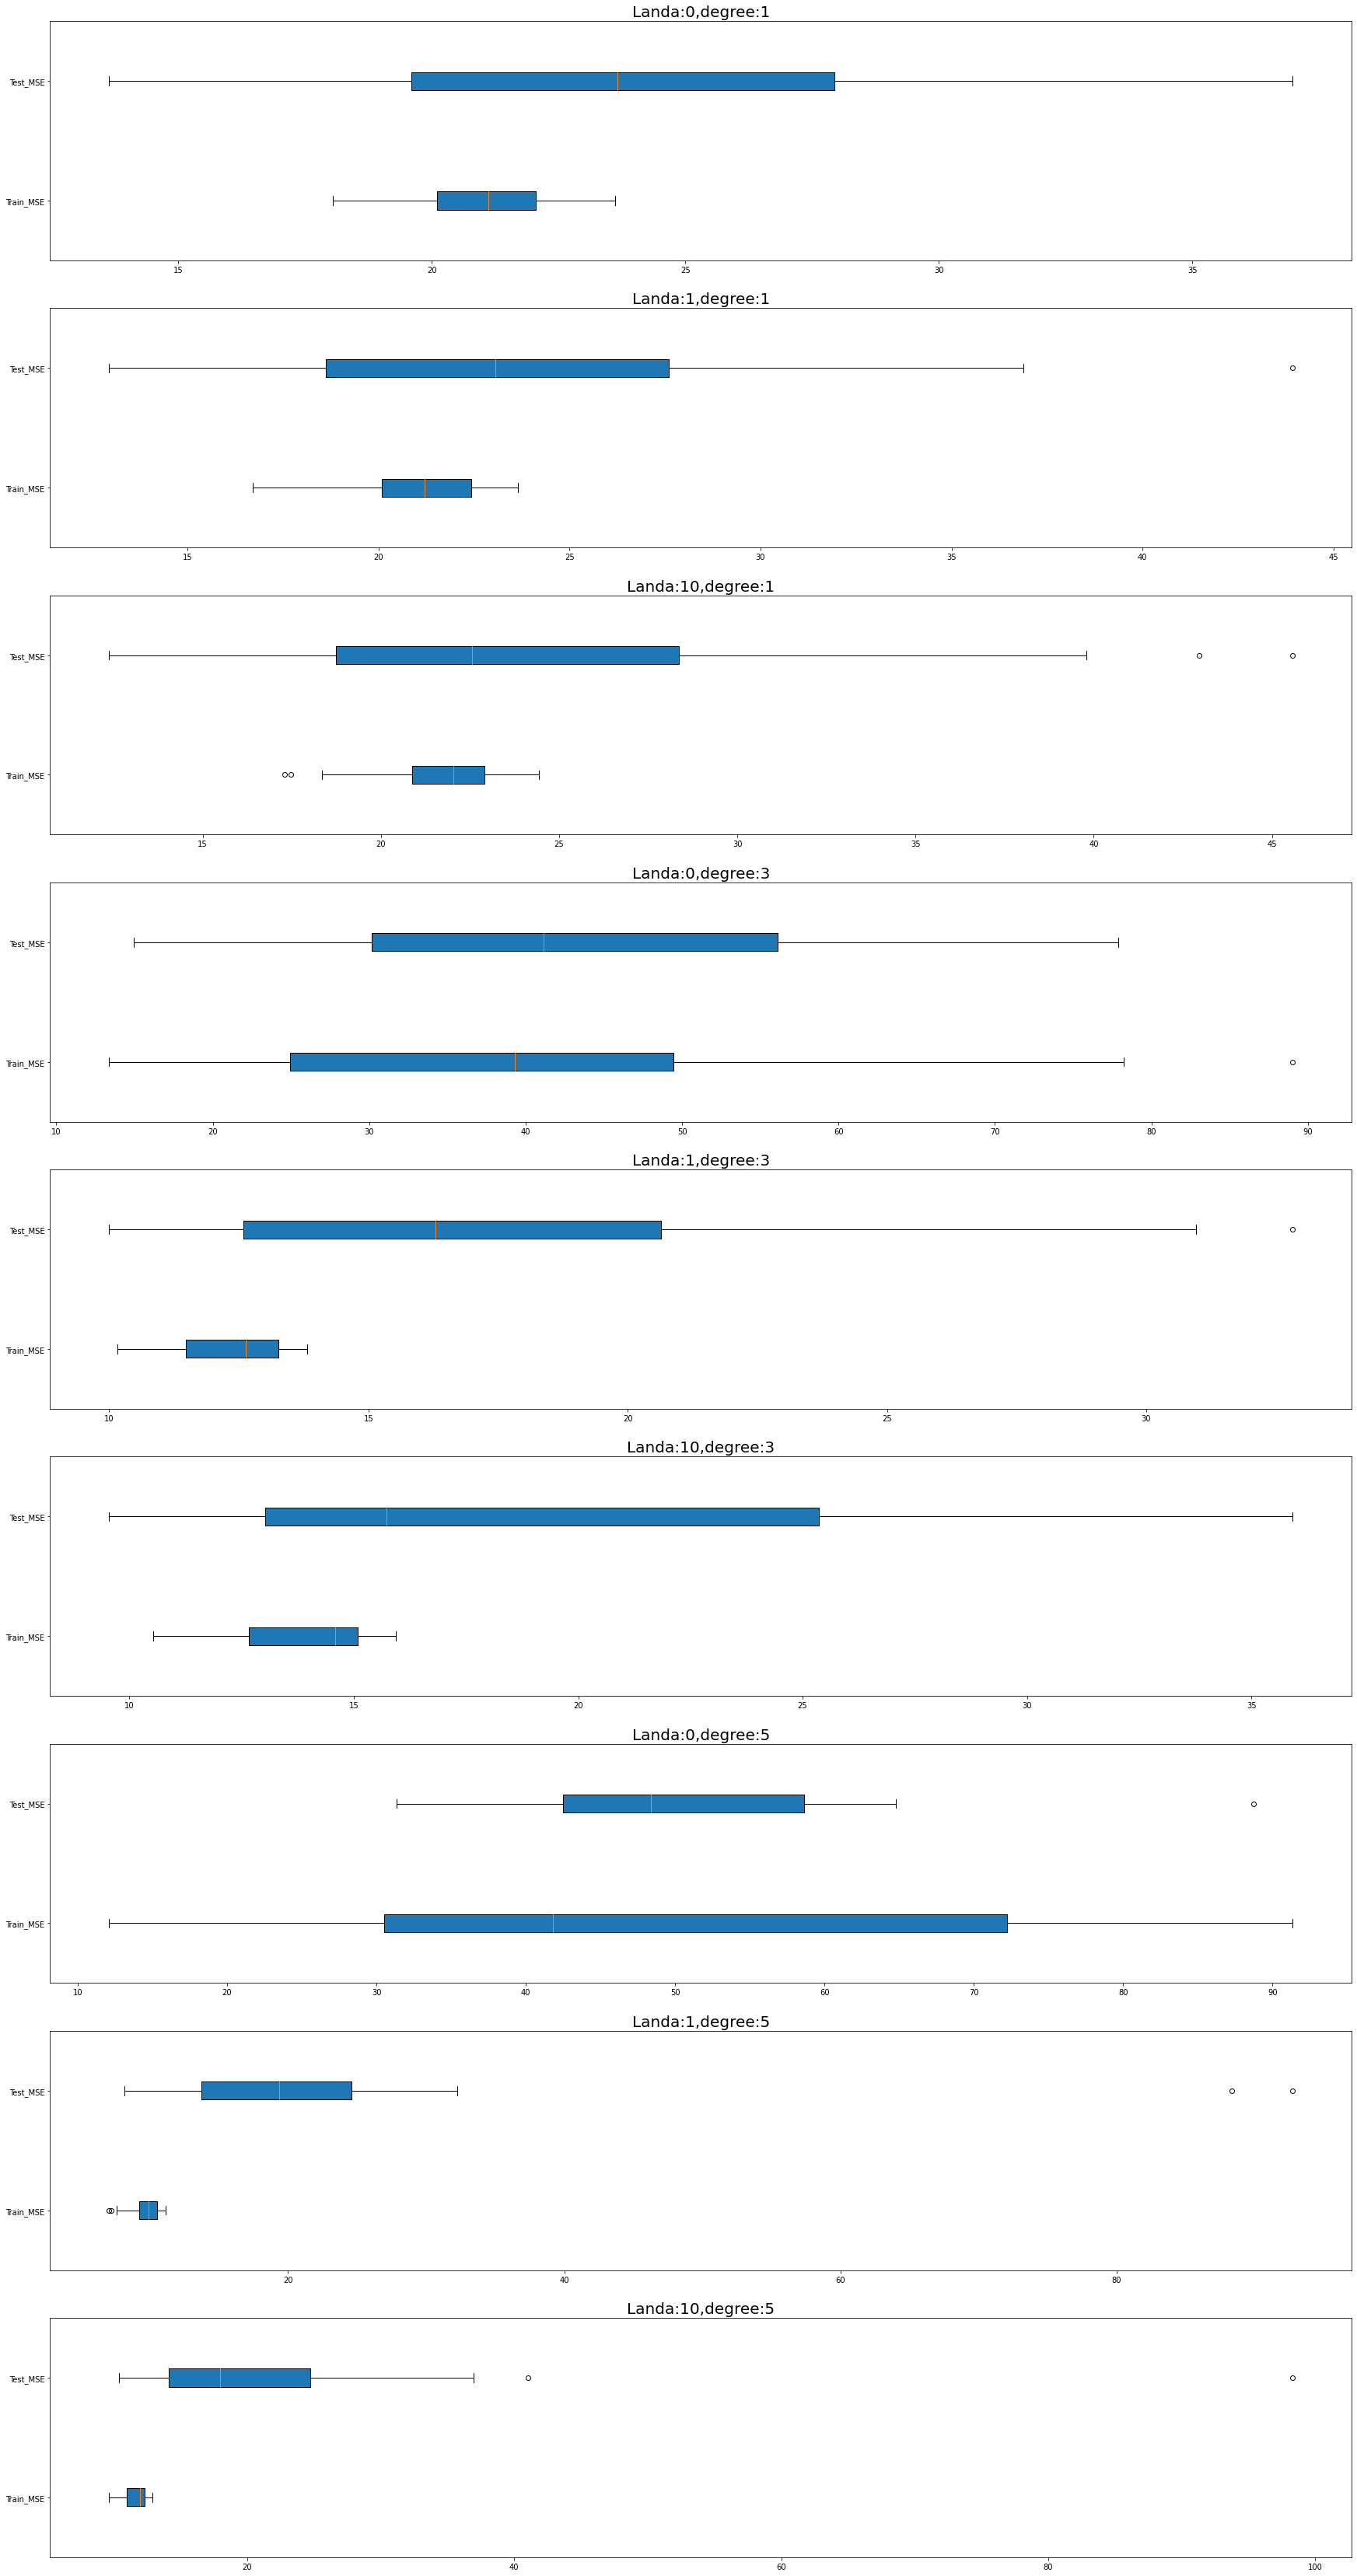

In [153]:
fig, ax = plt.subplots(nrows=9, ncols=1,figsize=(30, 60))
i=0
for degree in [1,3,5]:
    for landa in [0,1,10]:
        all_train_mse,all_valid_mse = CV_runner(train,landa,degree)
        all_train_mse = [e for e in all_train_mse if e<100]
        all_valid_mse = [e for e in all_valid_mse if e<100]
        ax[i].boxplot([all_train_mse,all_valid_mse],vert=False,patch_artist = True)
        ax[i].set_title(f'Landa:{landa},degree:{degree}',size=20)
        ax[i].set_yticklabels(['Train_MSE','Test_MSE'])
        i+=1
plt.show()

### We can now analysis landa and degree:
    
    degree=1 -> unexpectedly this simple model works very well! since both test and train MSE have low MSE. but test MSE 
    have large variance that show us this model can be much reliable. 
    
    degree=3 -> without landa term, this models are not doing realy well. because both train and test MSE are very large.
    so in this case we have underfitting since our model don't learn in traning and test. but when landa is 1 or 10 it's 
    get a little better but model variance is very larg!
    
    degree=5 -> in this degree we have large variance when landa is zero. also we have overfitting in landa=1 because 
    training MSE is much lower than test MSE. but when landa is 10 our model variance and MSE gets very low both for test
    and train! so this is our best choice for landa and degree.

In [156]:
#best landa is 10 in degree equal 5
X,y = make_future(train,5)
w = weight_calc(X,y,10)
MSE(w,X,y)

11.749629778287392

In [157]:
X,y = make_future(test,5)
X

,f0,f1^1,f2^1,f3^1,f4^1,f5^1,f6^1,f7^1,f8^1,f9^1,...,f4^5,f5^5,f6^5,f7^5,f8^5,f9^5,f10^5,f11^5,f12^5,f13^5
0,1,-0.502726,-0.542333,0.265412,-0.228266,-0.983042,-0.092208,-0.414743,0.576345,-0.532949,...,-0.00062,-0.918038,-0.000007,-0.012271,0.063593,-0.042996,-0.000019,0.000883,0.008270,1.206127e-11
1,1,-0.507296,-0.542333,-1.256578,-0.228266,-0.803745,0.210664,-0.245502,1.092893,-0.763663,...,-0.00062,-0.335422,0.000415,-0.000892,1.559154,-0.259723,-2.122283,0.000883,0.020349,-8.611811e-01
2,1,-0.496789,-0.542333,-1.216563,-0.228266,-0.547607,1.319663,0.888416,-0.563847,-0.763663,...,-0.00062,-0.049243,4.002357,0.553454,-0.056991,-0.259723,-4.242394,-0.000045,0.020349,-1.125890e+00
3,1,1.348256,-0.542333,1.018547,-0.228266,1.083141,0.749102,0.841028,-0.998091,1.658834,...,-0.00062,1.490819,0.235888,0.420778,-0.990492,12.560713,7.145836,0.523724,-330.487525,2.165551e+01
4,1,-0.143320,-0.542333,1.230054,-0.228266,2.722427,-0.892217,1.101660,-1.094836,-0.532949,...,-0.00062,149.548124,-0.565395,1.622700,-1.573062,-0.042996,-0.000004,-6.293852,-0.407707,2.530629e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.641287,-0.542333,1.018547,-0.228266,1.373431,0.698624,0.901955,-0.749649,1.658834,...,-0.00062,4.886911,0.166424,0.596932,-0.236750,12.560713,7.145836,0.523724,-453.315036,1.747277e-01
96,1,0.247065,-0.542333,1.018547,-0.228266,0.272036,-0.442498,0.966267,-0.642850,1.658834,...,-0.00062,0.001490,-0.016965,0.842337,-0.109786,12.560713,7.145836,0.523724,-0.000094,2.898433e+00
97,1,-0.464409,-0.542333,-0.183325,-0.228266,0.280574,-0.560282,-0.790459,-0.721015,-0.417592,...,-0.00062,0.001739,-0.055212,-0.308601,-0.194859,-0.012699,-0.000092,0.019765,0.027146,1.779477e-04
98,1,-0.010251,-0.542333,1.230054,-0.228266,0.451333,-0.292592,0.915495,-0.769461,-0.532949,...,-0.00062,0.018728,-0.002144,0.643101,-0.269733,-0.042996,-0.000004,-6.293852,-1.271267,-4.554465e-03


In [160]:
predicts = X.to_numpy()@w
predicts

array([18.08234379, 28.26200208, 39.26734638, 10.35421384, 16.96692398,
       10.74683024, 20.67725746, 45.41251882, 37.81046019, 45.98581991,
       24.36862924, 18.94986928, 20.23458529, 29.45978688, 26.41967875,
       16.61506726, 13.96852375, 21.99767974, 31.0586506 , 15.57133248,
       23.70190401, 19.99804609, 26.00221078, 13.48535344, 31.59683601,
       20.84433869, 17.62071863, 33.09346584, 16.50626078, 37.54036009,
       20.0434907 , 23.7505677 , 17.12660791, 28.19470297, 24.30149238,
       17.83561024, 18.43341905, 13.22702138, 17.4127828 , 20.68724736,
       28.38747844, 17.73054703, 16.35105181, 22.75681077, 35.7631749 ,
       22.04682425, 19.22195495, 16.4461834 , 19.93685553,  9.36620116,
       15.99416813, 20.66242896, 28.52506592, 33.5189154 , 33.89397542,
       27.09946289, 16.15728558, 13.87216501, 22.20385862, 23.74656077,
       18.03165213, 24.38916968, 12.4075922 , 26.38072673, 34.54449938,
       21.48474392, 27.63872558, 35.1187727 , 62.8978284 ,  7.96

In [162]:
pd.Series(predicts).to_csv('prediction.csv')